# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#city = citipy.nearest_city(22.99, 120.21)
#city.city_name

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
names = []
long = []
lat = []
temperatures = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try: 
        response = requests.get(base_url + city + "&appid=" + weather_api_key + "&units=imperial").json()
        names.append(response['name'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temperatures.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except: next
        

In [5]:
df = pd.DataFrame({'City': names, 'Longitud': long, 'Latitude': lat ,'Temperature':temperatures, 'Humidity': humidity, 'Cloudiness':cloudiness,\
                  'Wind_speed':wind_speed})
df.head()

,City,Longitud,Latitude,Temperature,Humidity,Cloudiness,Wind_speed
0,Yellowknife,-114.3525,62.4560,-4.00,84,75,6.91
1,Coro,-69.6734,11.4045,72.14,87,8,12.44
2,Saint Paul Harbor,-152.4072,57.7900,32.00,43,1,24.16
3,Zyryanka,150.8500,65.7500,-26.97,94,100,4.09
4,Rikitea,-134.9692,-23.1203,78.49,72,85,14.79


In [6]:
df.to_csv('temperatures.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df[df['Humidity'] > 100]


,City,Longitud,Latitude,Temperature,Humidity,Cloudiness,Wind_speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

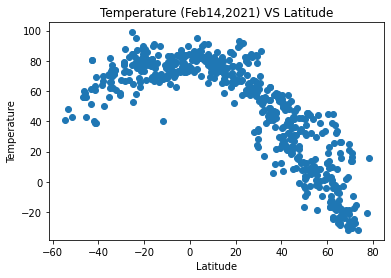

In [10]:
plt.scatter(df['Latitude'], df['Temperature'])
plt.title('Temperature (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('latVStemp.png')
plt.show()

Displays relation between latitude and temperature
Date: Feb 14 2021

## Latitude vs. Humidity Plot

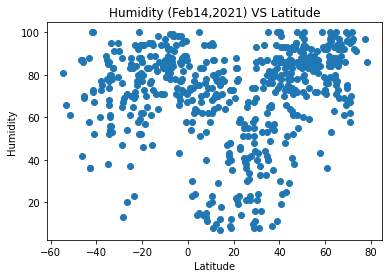

In [11]:
plt.scatter(df['Latitude'], df['Humidity'])
plt.title('Humidity (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('latitude_vs_humidity.png')
plt.show()

Displays relation between latitude and humidity
Date: Feb 14 2021

## Latitude vs. Cloudiness Plot

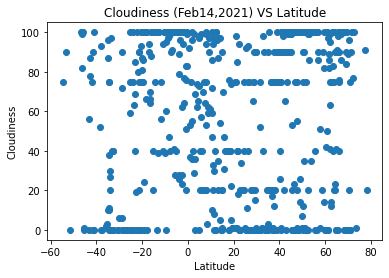

In [12]:
plt.scatter(df['Latitude'], df['Cloudiness'])
plt.title('Cloudiness (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('latitude_vs_cloudiness.png')
plt.show()

Displays relation between latitude and cloudiness
Date: Feb 14 2021

## Latitude vs. Wind Speed Plot

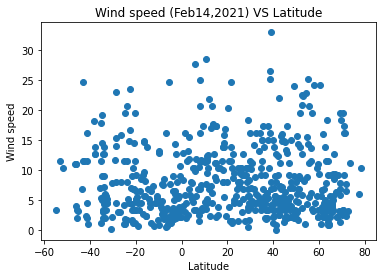

In [13]:
plt.scatter(df['Latitude'], df['Wind_speed'])
plt.title('Wind speed (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.savefig('latitude_vs_windspeed.png')
plt.show()

Displays relation between latitude and wind speed\
Date: Feb 14 2021

## Linear Regression

In [14]:
north = df[df['Latitude'] >= 0]
south = df[df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

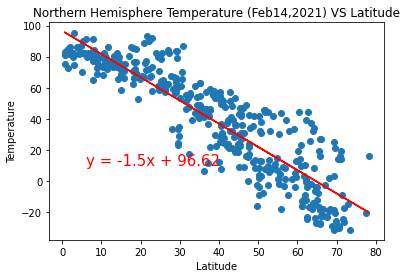

In [15]:
plt.scatter(north['Latitude'], north['Temperature'])
plt.title('Northern Hemisphere Temperature (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
x_values = north['Latitude']
y_values = north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

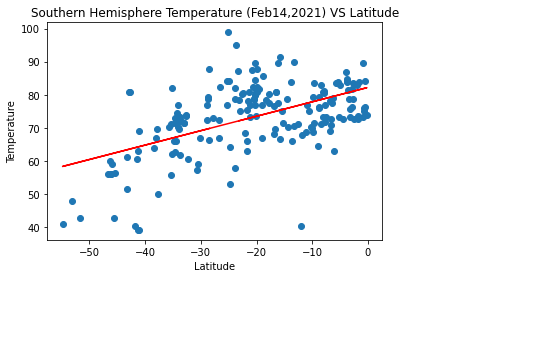

In [16]:
plt.scatter(south['Latitude'], south['Temperature'])
plt.title('Southern Hemisphere Temperature (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
x_values = south['Latitude']
y_values = south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

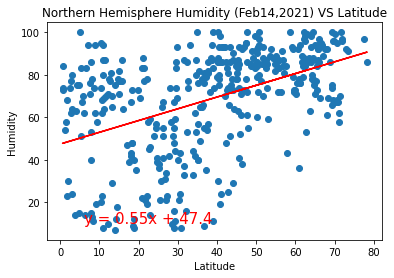

In [17]:
plt.scatter(north['Latitude'], north['Humidity'])
plt.title('Northern Hemisphere Humidity (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
x_values = north['Latitude']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

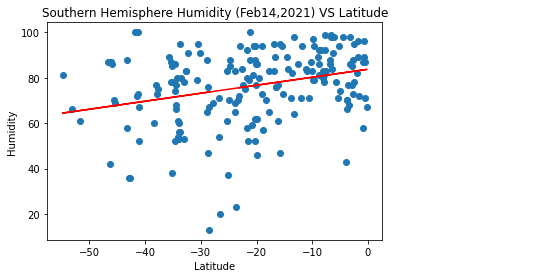

In [18]:
plt.scatter(south['Latitude'], south['Humidity'])
plt.title('Southern Hemisphere Humidity (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
x_values = south['Latitude']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

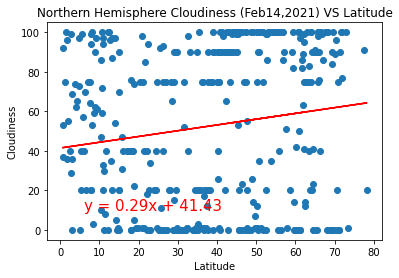

In [19]:
plt.scatter(north['Latitude'], north['Cloudiness'])
plt.title('Northern Hemisphere Cloudiness (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
x_values = north['Latitude']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

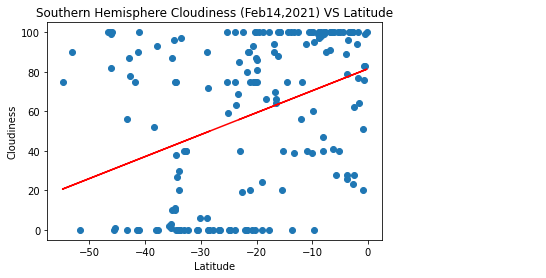

In [20]:
plt.scatter(south['Latitude'], south['Cloudiness'])
plt.title('Southern Hemisphere Cloudiness (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
x_values = south['Latitude']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

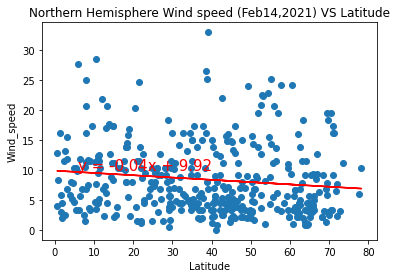

In [21]:
plt.scatter(north['Latitude'], north['Wind_speed'])
plt.title('Northern Hemisphere Wind speed (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind_speed')
x_values = north['Latitude']
y_values = north['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

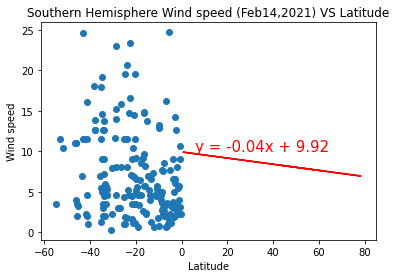

In [22]:
plt.scatter(south['Latitude'], south['Wind_speed'])
plt.title('Southern Hemisphere Wind speed (Feb14,2021) VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
x_values = north['Latitude']
y_values = north['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()